In [2]:
import pgeon.policy_graph as PG
from example.environment import SelfDrivingEnvironment
import networkx as nx
from example.discretizer.discretizer_d0 import AVDiscretizer
from example.discretizer.discretizer_d1 import AVDiscretizerD1
from pgeon.NetworkVisualizer import NetworkVisualizer
from collections import Counter


analysing graph with discretiser 0a 
GRAPH PROPERTIES: 
density: 0.014571070633153039
sparsity: 6.527839643652562
|E|: 2931
|V|: 449
|V|*(|V|-1): 201152
counts for each Strongly Connected Component size: Counter({1: 64, 2: 5, 165: 1, 205: 1, 5: 1})


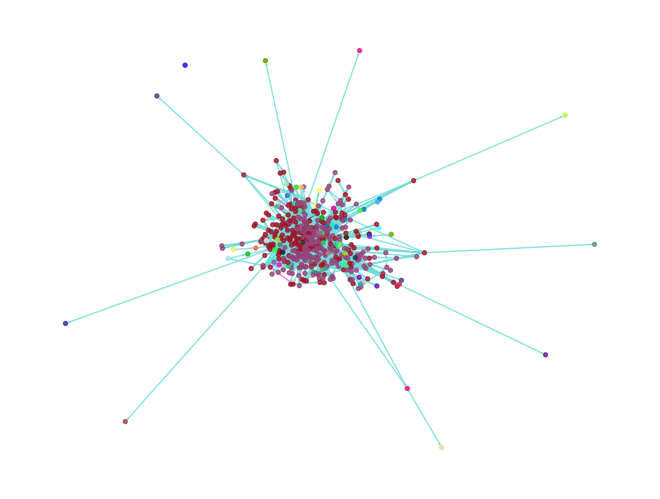

analysing graph with discretiser 0b 
GRAPH PROPERTIES: 
density: 0.006348212888660393
sparsity: 6.843373493975903
|E|: 7384
|V|: 1079
|V|*(|V|-1): 1163162
counts for each Strongly Connected Component size: Counter({1: 117, 2: 9, 6: 2, 5: 1, 415: 1, 498: 1, 7: 1, 3: 1, 4: 1})


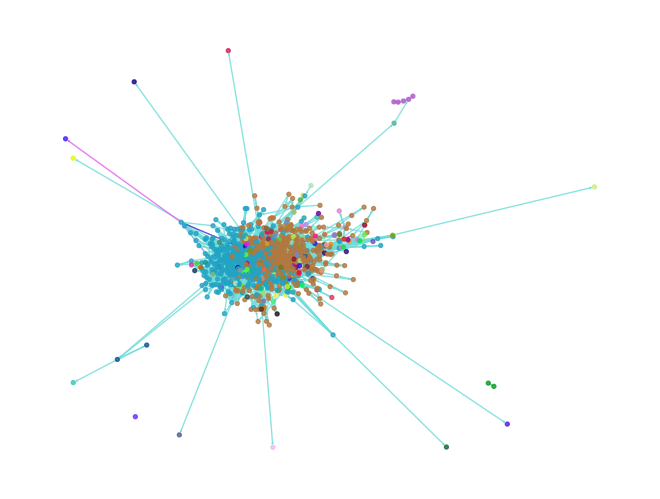

analysing graph with discretiser 0c 
GRAPH PROPERTIES: 
density: 0.00327516748427702
sparsity: 5.702066590126291
|E|: 9933
|V|: 1742
|V|*(|V|-1): 3032822
counts for each Strongly Connected Component size: Counter({1: 224, 2: 19, 3: 3, 4: 2, 6: 2, 5: 1, 670: 1, 769: 1, 7: 1})


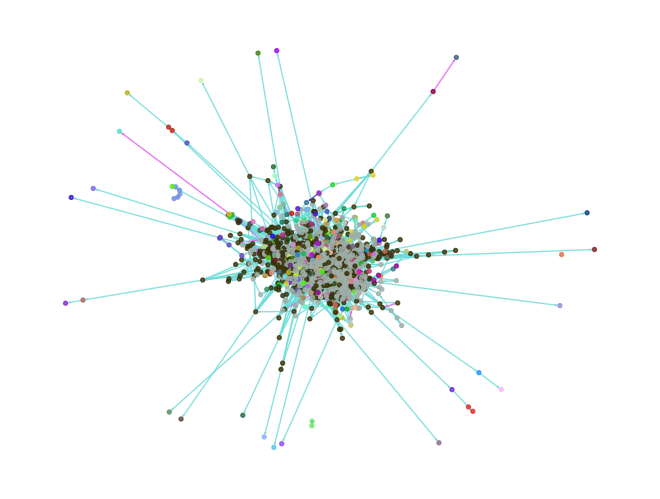

analysing graph with discretiser 1a 
GRAPH PROPERTIES: 
density: 0.0032923218748249572
sparsity: 5.666085946573752
|E|: 9757
|V|: 1722
|V|*(|V|-1): 2963562
counts for each Strongly Connected Component size: Counter({1: 227, 2: 18, 4: 4, 3: 3, 6: 1, 700: 1, 721: 1, 7: 1})


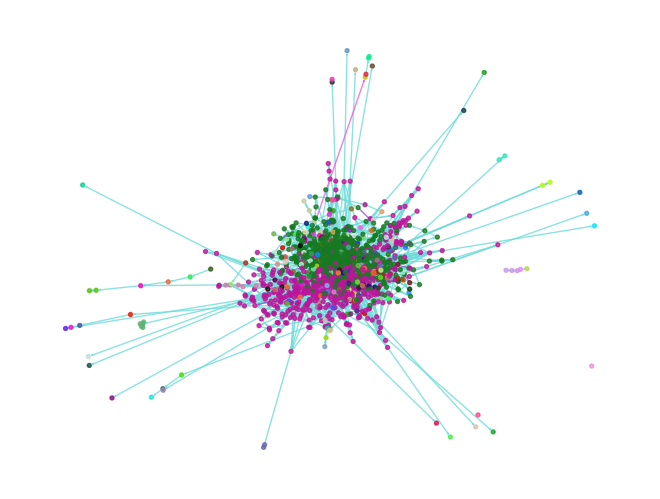

analysing graph with discretiser 1b 
GRAPH PROPERTIES: 
density: 0.0013429590982656058
sparsity: 4.485483388207124
|E|: 14986
|V|: 3341
|V|*(|V|-1): 11158940
counts for each Strongly Connected Component size: Counter({1: 566, 2: 42, 3: 13, 4: 8, 5: 2, 6: 2, 10: 1, 1321: 1, 1258: 1, 9: 1})


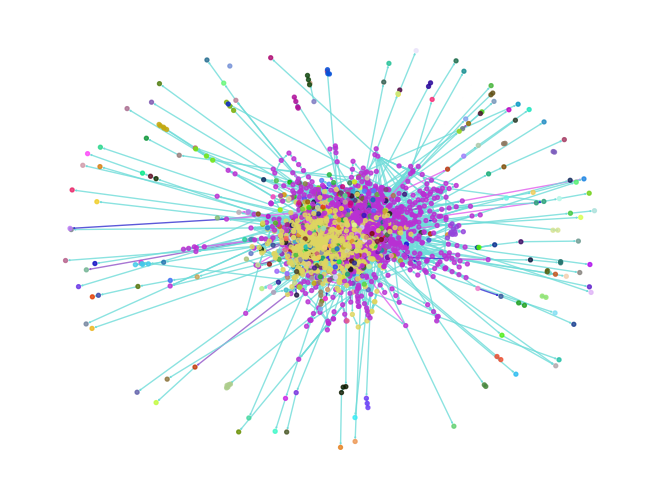

analysing graph with discretiser 1c 
GRAPH PROPERTIES: 
density: 0.0007337293383526875
sparsity: 3.6114158033719277
|E|: 17779
|V|: 4923
|V|*(|V|-1): 24231006
counts for each Strongly Connected Component size: Counter({1: 1080, 2: 65, 3: 16, 4: 9, 5: 3, 6: 2, 10: 1, 1900: 1, 1683: 1, 9: 1})


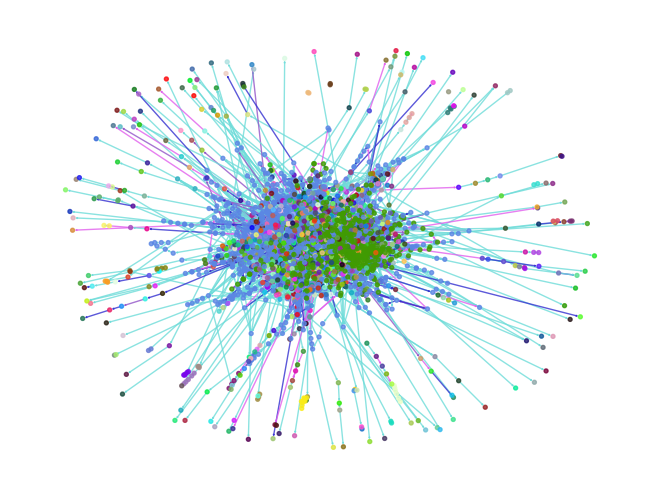

In [3]:
environment = SelfDrivingEnvironment(city='all')
discretizer_configs = {
    'a': {'obj_discretizer': 'binary', 'vel_discretizer': 'binary' },
    'b': {'obj_discretizer': 'multiple', 'vel_discretizer': 'binary'},
    'c': {'obj_discretizer': 'multiple', 'vel_discretizer': 'multiple'}
    }

default_config = {'obj_discretizer': 'multiple', 'vel_discretizer': 'multiple'}

for discretizer_id in ['0a','0b','0c','1a','1b','1c']:
    config = default_config
    for key in discretizer_configs:
        if key in discretizer_id:
            config = discretizer_configs[key]
            break

    DiscretizerClass = AVDiscretizer if '0' in discretizer_id else AVDiscretizerD1
    discretizer = DiscretizerClass(
            environment,
            vel_discretization=config['vel_discretizer'],
            obj_discretization=config['obj_discretizer'],
            id=discretizer_id
        ) 
    nodes_path = f'example/dataset/data/policy_graphs/PG_trainval_Call_D{discretizer_id}_Wall_Tall_nodes.csv'
    edges_path = f'example/dataset/data/policy_graphs/PG_trainval_Call_D{discretizer_id}_Wall_Tall_edges.csv'
    print(f'analysing graph with discretiser {discretizer_id} ')
    pg = PG.PolicyGraph.from_nodes_and_edges(nodes_path, edges_path, environment, discretizer)


    num_nodes = pg.number_of_nodes()
    num_edges = pg.number_of_edges()

    print('GRAPH PROPERTIES: ')
    density = num_edges / (num_nodes * (num_nodes - 1))
    sparsity = num_edges / num_nodes
    print(f'density: {density}')
    print(f'sparsity: {sparsity}')
    print(f'|E|: {num_edges}')
    print(f'|V|: {num_nodes}')
    print(f'|V|*(|V|-1): {num_nodes*(num_nodes-1)}')

    cc = list(nx.strongly_connected_components(pg))
    
    # Get sizes of the connected components
    cc_sizes = [len(component) for component in cc]
    
    # Count occurrences of each size
    size_counts = Counter(cc_sizes)
    print(f'counts for each Strongly Connected Component size: {size_counts}')
    nv = NetworkVisualizer(pg, layout='')
    nv.show(allow_recursion=False, layout='spring')